# Capstone Project Part 03: EDA and Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
edgar = pd.read_csv('../data/edgar.csv')

In [3]:
edgar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11241933 entries, 0 to 11241932
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   security     object
 1   name         object
 2   value        object
 3   unit_ref     object
 4   context_ref  object
dtypes: object(5)
memory usage: 428.8+ MB


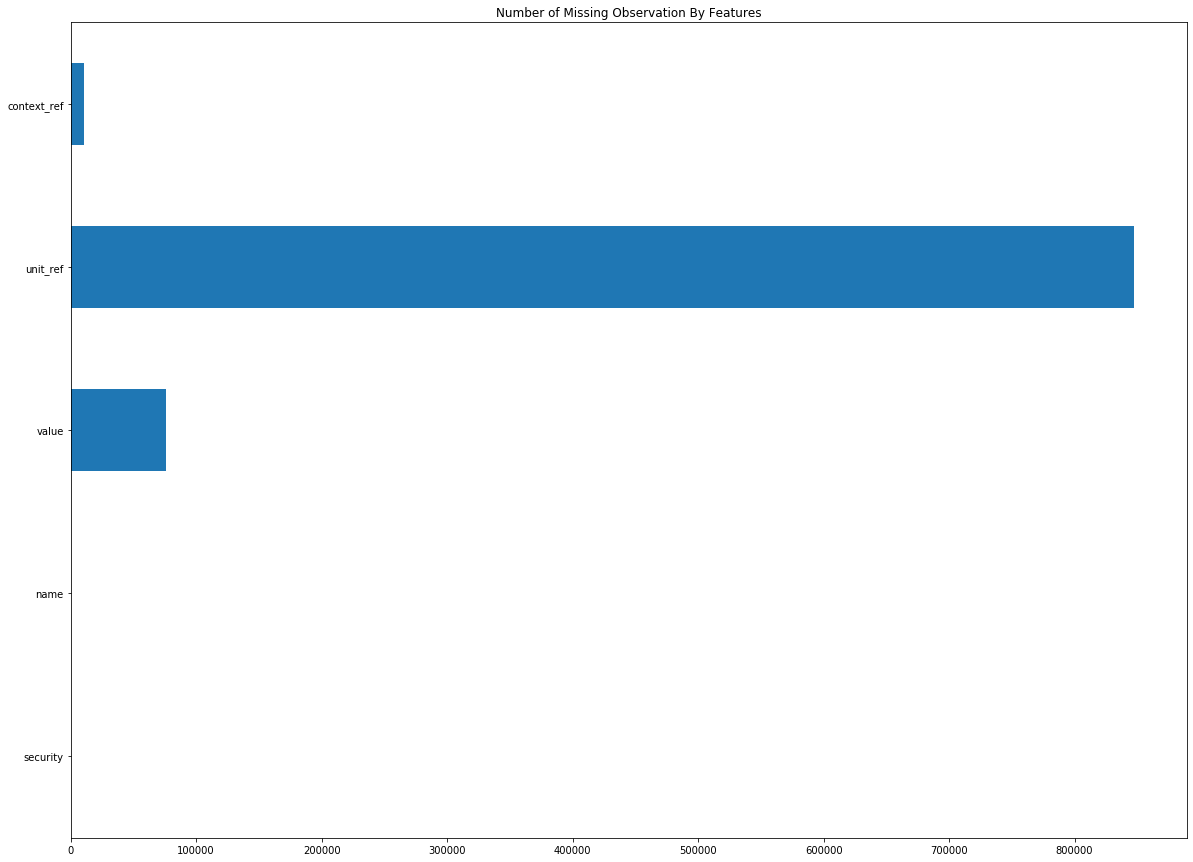

In [4]:
edgar.isnull().sum().plot.barh(
    figsize=(20, 15), 
    title='Number of Missing Observation By Features'
);

---

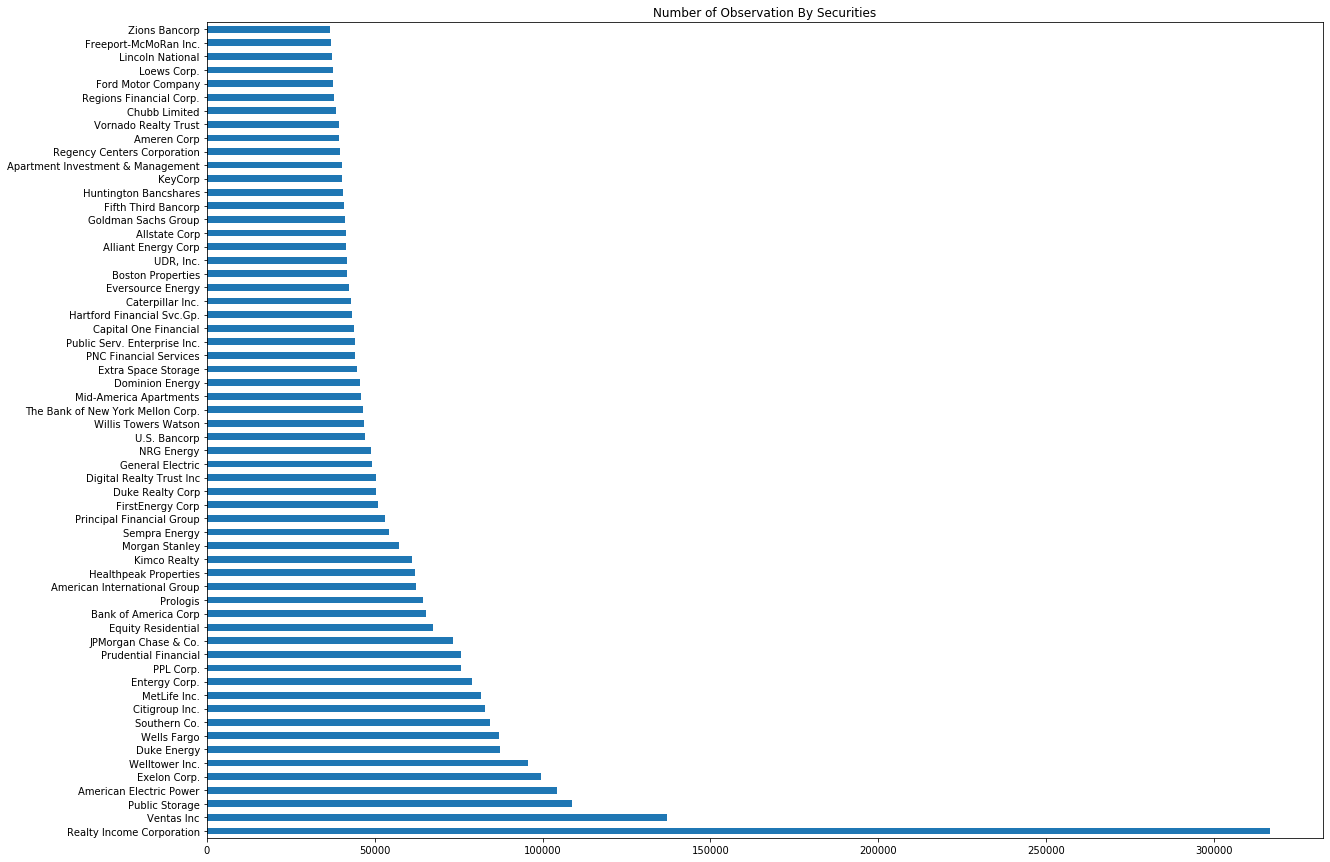

In [5]:
edgar['security'].value_counts()[:60].plot.barh(
    figsize=(20, 15), 
    title='Number of Observation By Securities'
);

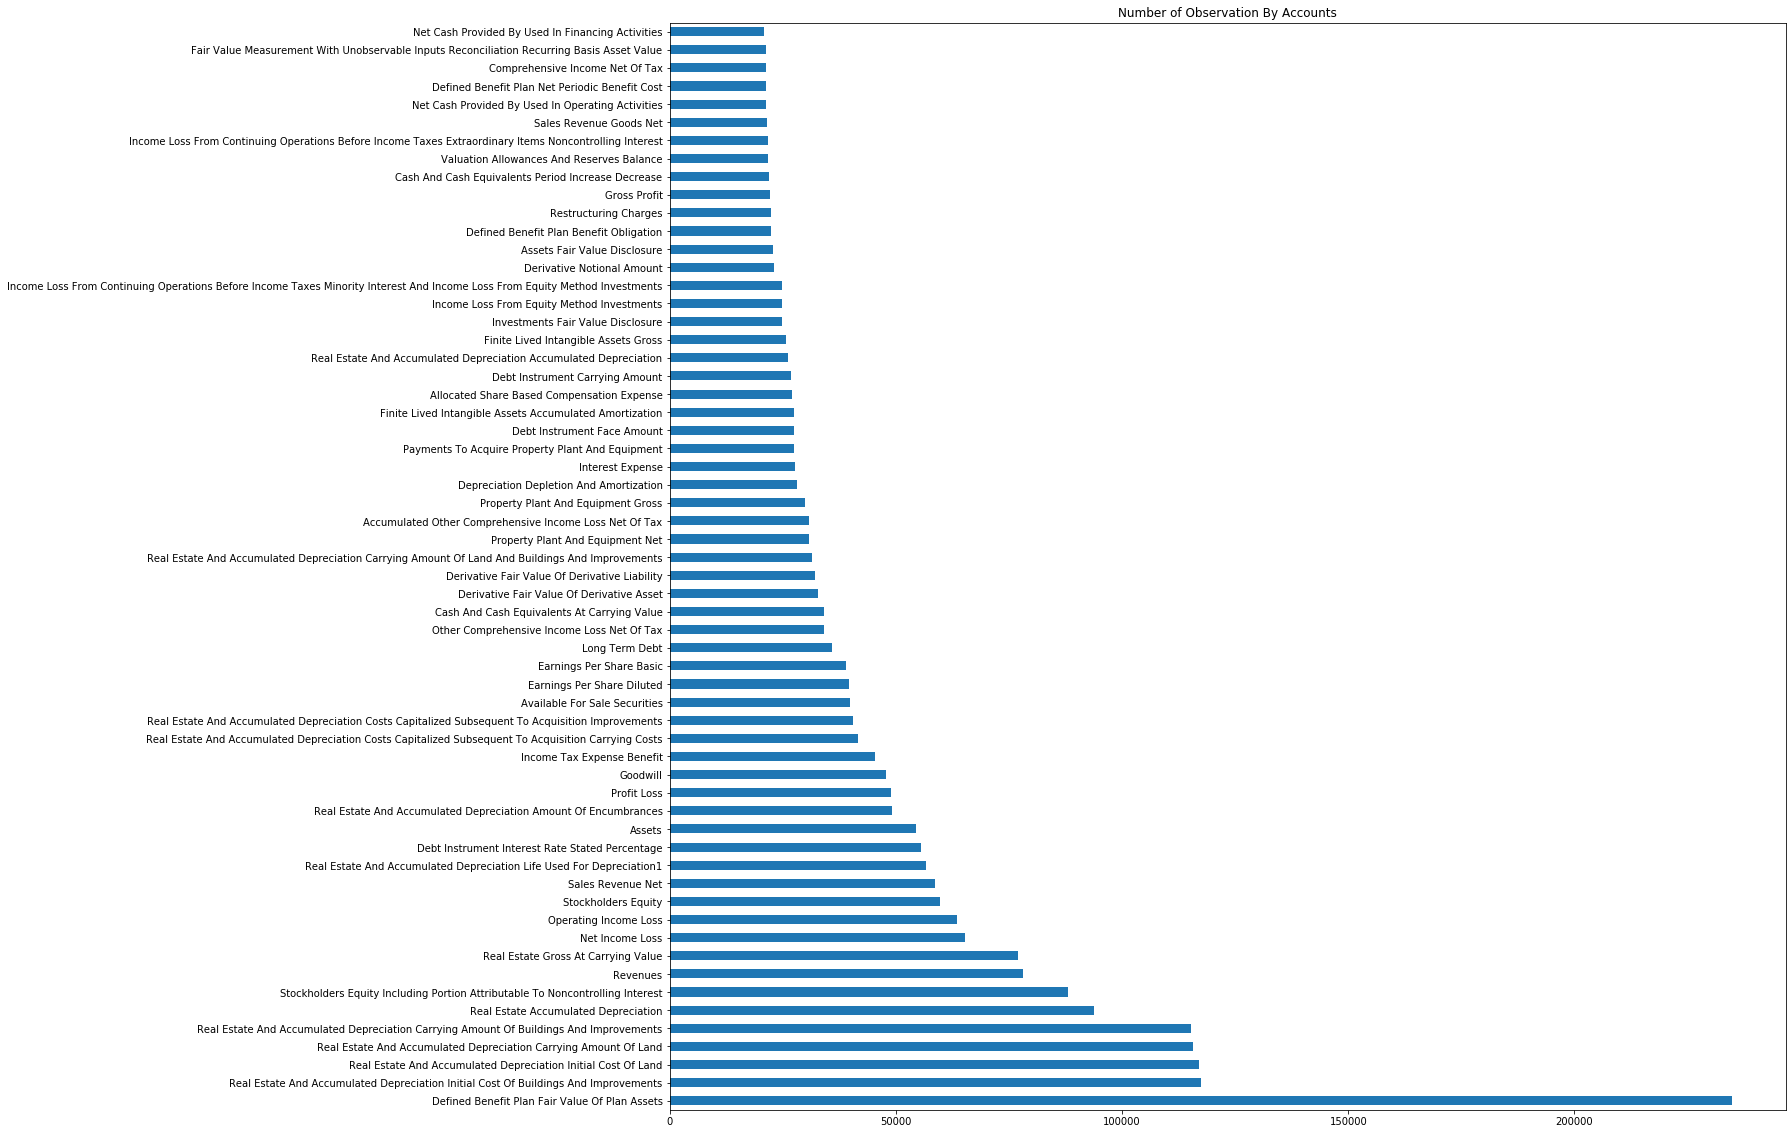

In [6]:
edgar['name'].value_counts()[:60].plot.barh(
    figsize=(20, 20),
    title='Number of Observation By Accounts'
);

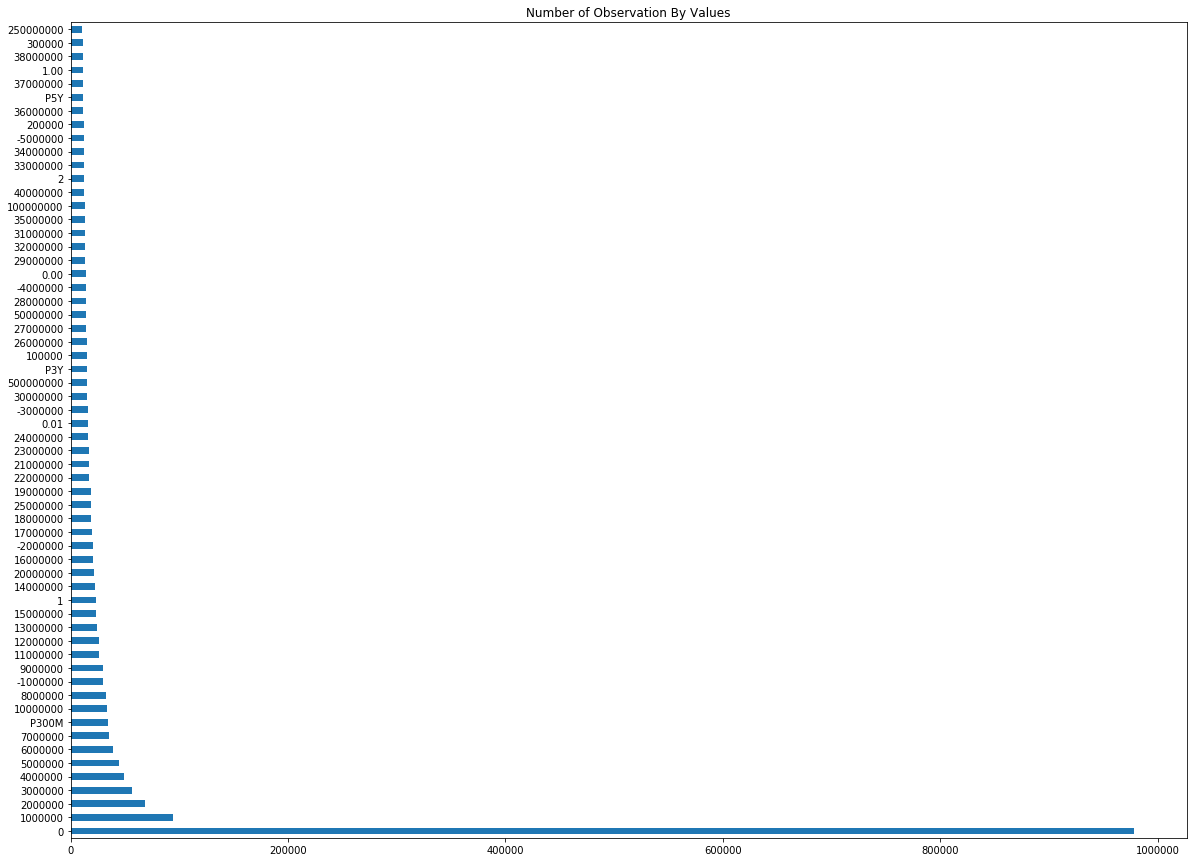

In [7]:
edgar['value'].value_counts()[:60].plot.barh(
    figsize=(20, 15),
    title='Number of Observation By Values'
);

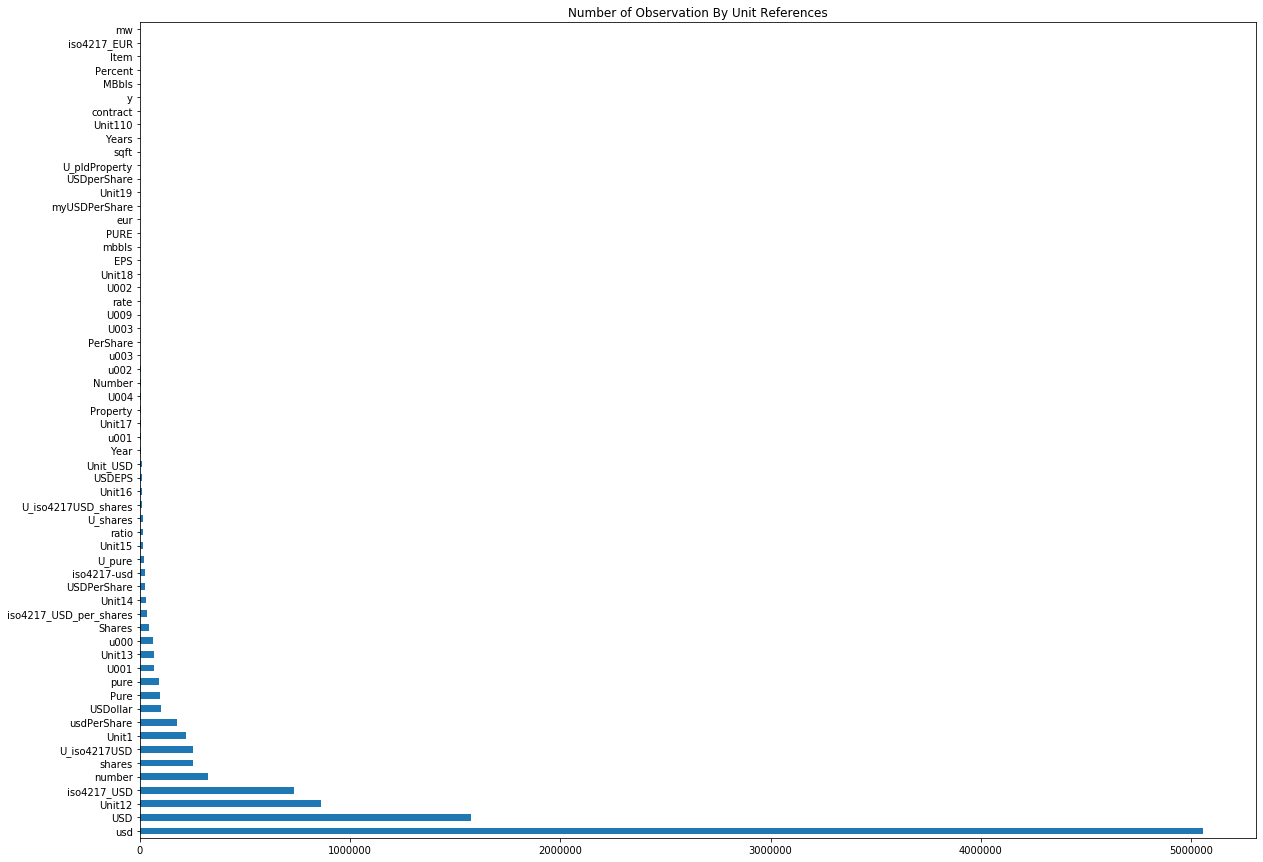

In [8]:
edgar['unit_ref'].value_counts()[:60].plot.barh(
    figsize=(20, 15),
    title='Number of Observation By Unit References'
);

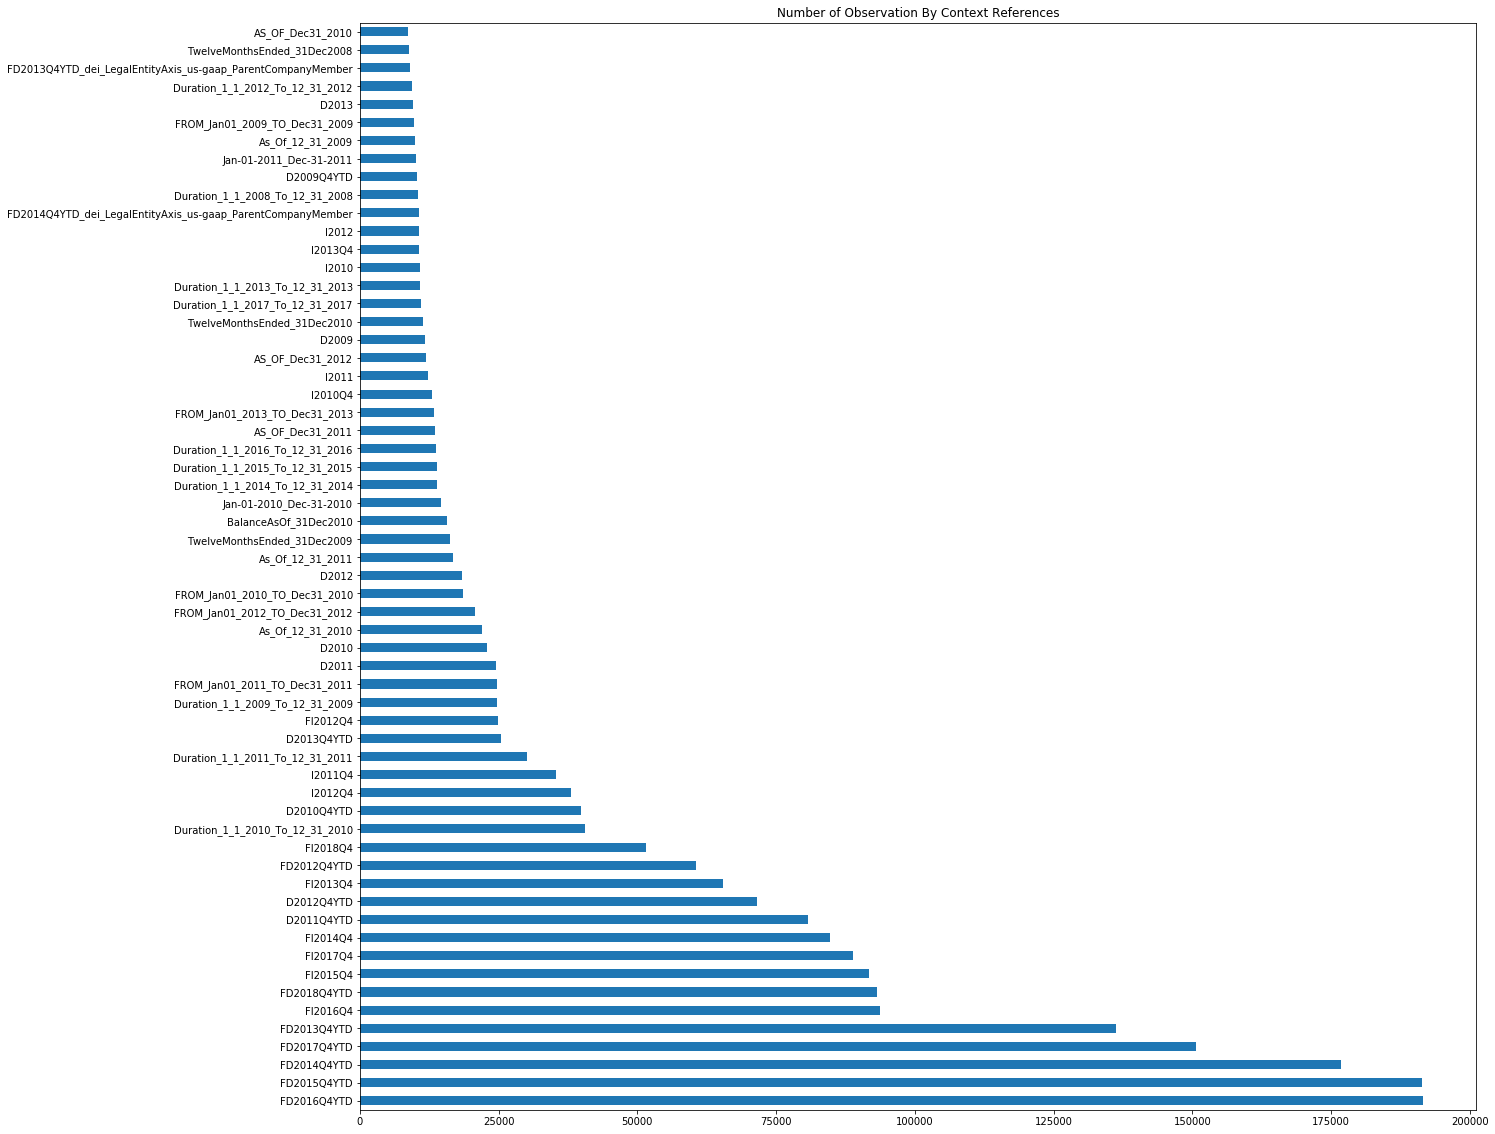

In [9]:
edgar['context_ref'].value_counts()[:60].plot.barh(
    figsize=(20, 20),
    title='Number of Observation By Context References'
);

---

In [10]:
edgar = edgar[
    edgar['value'].notnull()
]

In [11]:
edgar['number'] = pd.to_numeric(edgar['value'], errors='coerce')

In [12]:
edgar.loc[
    edgar[
        edgar['number'].notnull()
    ].index, 
    'value'
] = np.nan

In [13]:
edgar[edgar['number'] == 0].shape

(1003390, 6)

In [14]:
edgar.drop(index=edgar[edgar['number'] == 0].index, inplace=True)

---

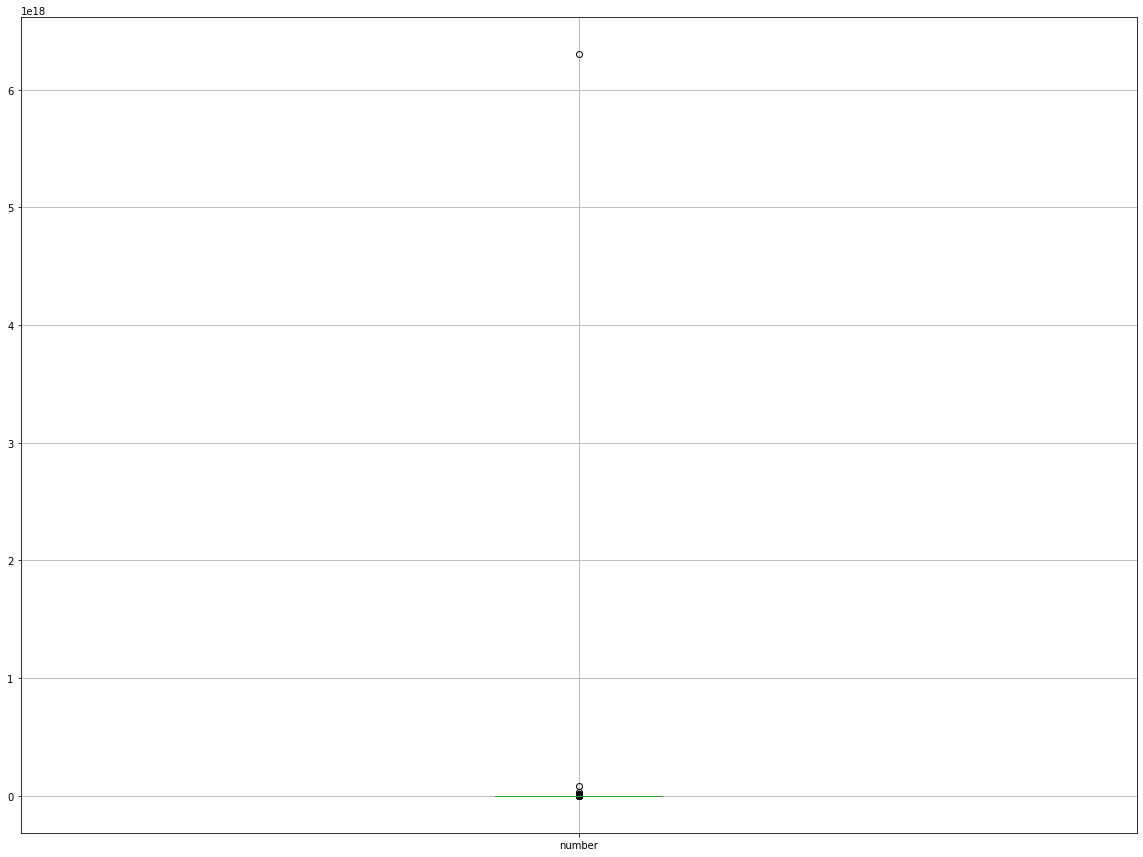

In [15]:
edgar.boxplot(
    column='number', 
    figsize=(20, 15)
);

In [16]:
edgar[
    edgar['number'] > 100_000_000_000_000_000
]

,security,name,value,unit_ref,context_ref,number
281293,Albemarle Corp,Entity Public Float,NaN,Unit1,As_Of_6_30_2011,6.300000e+18


In [17]:
edgar[
    (edgar['security'] == 'Albemarle Corp') & 
    (edgar['name'] == 'Entity Public Float')
]

,security,name,value,unit_ref,context_ref,number
264030,Albemarle Corp,Entity Public Float,NaN,usd,FI2018Q2,1.020000e+10
266421,Albemarle Corp,Entity Public Float,NaN,usd,FI2017Q2,1.170000e+10
268933,Albemarle Corp,Entity Public Float,NaN,usd,FI2016Q2,8.900000e+09
271510,Albemarle Corp,Entity Public Float,NaN,usd,FI2015Q2,6.200000e+09
274131,Albemarle Corp,Entity Public Float,NaN,usd,FI2014Q2,5.600000e+09
278857,Albemarle Corp,Entity Public Float,NaN,usd,I2013Q2June28,5.100000e+09
278869,Albemarle Corp,Entity Public Float,NaN,iso4217_USD,eol_PE8245----1210-K0011_STD_0_20120629_0,5.300000e+09
281293,Albemarle Corp,Entity Public Float,NaN,Unit1,As_Of_6_30_2011,6.300000e+18
283068,Albemarle Corp,Entity Public Float,NaN,Unit1,As_Of_6_30_2010,3.600000e+09


In [18]:
edgar.loc[
    edgar['number'] > 10_000_000_000_000_000, 
    'number'
] /= 1_000_000_000

---

In [19]:
edgar[
    (edgar['number'] > 80_000_000_000_000) | 
    (edgar['number'] < -10_000_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
86435,Activision Blizzard,Entity Public Float,NaN,USD,AS_OF_Jun30_2011,4.843917e+15
87764,Activision Blizzard,Entity Public Float,NaN,USD,AS_OF_Jun30_2010,5.230966e+15
263386,Alaska Air Group Inc,Entity Public Float,NaN,usd,I2010Q2PublicFloat,1.600000e+15
1623136,Boeing Company,Stock Shares Terminated,NaN,Unit14,Duration_1_1_2010_To_12_31_2010,-2.994892e+13
3271821,Dominion Energy,Notional Amount Of Interest Rate Derivatives,NaN,usd,I2012Q4_dei_LegalEntityAxis_d_VirginiaElectric...,5.000000e+14
3271822,Dominion Energy,Notional Amount Of Interest Rate Derivatives,NaN,usd,I2012Q4_dei_LegalEntityAxis_d_VirginiaElectric...,2.500000e+14
4287240,Fifth Third Bancorp,Shares Outstanding,NaN,shares,eol_PE7793----1010-K0029_STD_0_20071231_0_4118...,5.834271e+14
4287307,Fifth Third Bancorp,Shares Outstanding,NaN,shares,eol_PE7793----1010-K0029_STD_0_20081231_0_4118...,5.834271e+14
4287873,Fifth Third Bancorp,Shares Outstanding,NaN,shares,eol_PE7793----1010-K0029_STD_0_20091231_0_4118...,8.015042e+14
4288821,Fifth Third Bancorp,Shares Outstanding,NaN,shares,eol_PE7793----1010-K0029_STD_0_20101231_0_4118...,8.015042e+14


In [20]:
edgar[
    (edgar['security'] == 'Activision Blizzard') & 
    (edgar['name'] == 'Entity Public Float')
]

,security,name,value,unit_ref,context_ref,number
75516,Activision Blizzard,Entity Public Float,NaN,usd,FI2018Q2,5.744746e+10
77081,Activision Blizzard,Entity Public Float,NaN,usd,FI2017Q2,4.258734e+10
78505,Activision Blizzard,Entity Public Float,NaN,usd,FI2016Q2,2.788457e+10
79901,Activision Blizzard,Entity Public Float,NaN,usd,FI2015Q2,1.334568e+10
81036,Activision Blizzard,Entity Public Float,NaN,USD,AS_OF_Jun30_2014,1.183686e+10
82366,Activision Blizzard,Entity Public Float,NaN,USD,AS_OF_Jun28_2013,5.992872e+09
83771,Activision Blizzard,Entity Public Float,NaN,USD,AS_OF_Jun29_2012,4.910586e+09
85103,Activision Blizzard,Entity Public Float,NaN,USD,AS_OF_Jun29_2012,4.910586e+09
86435,Activision Blizzard,Entity Public Float,NaN,USD,AS_OF_Jun30_2011,4.843917e+15
87764,Activision Blizzard,Entity Public Float,NaN,USD,AS_OF_Jun30_2010,5.230966e+15


In [21]:
edgar[
    (edgar['security'] == 'Alaska Air Group Inc') & 
    (edgar['name'] == 'Entity Public Float')
]

,security,name,value,unit_ref,context_ref,number
250802,Alaska Air Group Inc,Entity Public Float,NaN,usd,FI2018Q2,7.400000e+09
252461,Alaska Air Group Inc,Entity Public Float,NaN,usd,FI2016Q2,1.110000e+10
253947,Alaska Air Group Inc,Entity Public Float,NaN,usd,FI2015Q2,7.100000e+09
255431,Alaska Air Group Inc,Entity Public Float,NaN,usd,FI2015Q2,8.200000e+09
256823,Alaska Air Group Inc,Entity Public Float,NaN,usd,FI2014Q2,6.400000e+09
259774,Alaska Air Group Inc,Entity Public Float,NaN,usd,FI2013Q2,3.600000e+09
261389,Alaska Air Group Inc,Entity Public Float,NaN,usd,I2012Q2,2.500000e+09
263148,Alaska Air Group Inc,Entity Public Float,NaN,usd,I2011Q2,2.500000e+09
263386,Alaska Air Group Inc,Entity Public Float,NaN,usd,I2010Q2PublicFloat,1.600000e+15


In [22]:
edgar[
    (edgar['security'] == 'Boeing Company') & 
    (edgar['name'] == 'Stock Shares Terminated')
]

,security,name,value,unit_ref,context_ref,number
1620214,Boeing Company,Stock Shares Terminated,NaN,shares,D2010Q4YTD,-2.994892e+07
1620600,Boeing Company,Stock Shares Terminated,NaN,Unit14,Duration_1_1_2010_To_12_31_2010,-2.994892e+07
1623136,Boeing Company,Stock Shares Terminated,NaN,Unit14,Duration_1_1_2010_To_12_31_2010,-2.994892e+13


In [23]:
edgar[
    (edgar['security'] == 'Dominion Energy') & 
    (edgar['name'] == 'Notional Amount Of Interest Rate Derivatives')
]

,security,name,value,unit_ref,context_ref,number
3271819,Dominion Energy,Notional Amount Of Interest Rate Derivatives,NaN,usd,I2012Q4_us-gaap_DerivativeInstrumentRiskAxis_d...,2.250000e+09
3271820,Dominion Energy,Notional Amount Of Interest Rate Derivatives,NaN,usd,I2012Q4_us-gaap_DerivativeInstrumentRiskAxis_d...,1.500000e+09
3271821,Dominion Energy,Notional Amount Of Interest Rate Derivatives,NaN,usd,I2012Q4_dei_LegalEntityAxis_d_VirginiaElectric...,5.000000e+14
3271822,Dominion Energy,Notional Amount Of Interest Rate Derivatives,NaN,usd,I2012Q4_dei_LegalEntityAxis_d_VirginiaElectric...,2.500000e+14
3275752,Dominion Energy,Notional Amount Of Interest Rate Derivatives,NaN,usd,I2011Q4_us-gaap_DerivativeInstrumentRiskAxis_d...,2.090000e+09
3275753,Dominion Energy,Notional Amount Of Interest Rate Derivatives,NaN,usd,I2011Q4_us-gaap_DerivativeInstrumentRiskAxis_d...,2.200000e+09
3279696,Dominion Energy,Notional Amount Of Interest Rate Derivatives,NaN,Unit1,As_Of_12_31_20107231,1.000000e+09


In [24]:
edgar[
    (edgar['security'] == 'Fifth Third Bancorp') & 
    (edgar['name'] == 'Shares Outstanding')
]

,security,name,value,unit_ref,context_ref,number
4252391,Fifth Third Bancorp,Shares Outstanding,NaN,shares,AS_OF_Dec31_2017_Entity_0000035527_us-gaap_Sta...,9.238926e+08
4252392,Fifth Third Bancorp,Shares Outstanding,NaN,shares,AS_OF_Dec31_2015_Entity_0000035527_us-gaap_Sta...,9.238926e+08
4252393,Fifth Third Bancorp,Shares Outstanding,NaN,shares,AS_OF_Dec31_2015_Entity_0000035527_us-gaap_Sta...,5.400000e+04
4252394,Fifth Third Bancorp,Shares Outstanding,NaN,shares,AS_OF_Dec31_2017_Entity_0000035527_us-gaap_Sta...,5.400000e+04
4252395,Fifth Third Bancorp,Shares Outstanding,NaN,shares,AS_OF_Dec31_2016_Entity_0000035527_us-gaap_Sta...,5.400000e+04
...,...,...,...,...,...,...
4287878,Fifth Third Bancorp,Shares Outstanding,NaN,shares,eol_PE7793----1010-K0029_STD_0_20091231_0_4118...,1.527710e+11
4287891,Fifth Third Bancorp,Shares Outstanding,NaN,shares,eol_PE7793----1010-K0029_STD_0_20091231_0_4118...,6.436024e+12
4288821,Fifth Third Bancorp,Shares Outstanding,NaN,shares,eol_PE7793----1010-K0029_STD_0_20101231_0_4118...,8.015042e+14
4288826,Fifth Third Bancorp,Shares Outstanding,NaN,shares,eol_PE7793----1010-K0029_STD_0_20101231_0_4118...,1.527710e+11


Noted the numbers should be 583,427,104 (`4287240` and `4287307`), 801,504,188 (`4287873` and `4288821`), and 51,482,500 (`4287244`) respectively, from https://www.sec.gov/cgi-bin/viewer?action=view&cik=35527&accession_number=0001193125-11-049817&xbrl_type=v#.

In [25]:
edgar.loc[
    (edgar['security'] == 'Fifth Third Bancorp') &
    (edgar['name'] == 'Shares Outstanding') &
    (edgar['number'] > 10_000_000_000_000),
    'number'
] /= 1_000_000

In [26]:
edgar[
    (edgar['security'] == 'Fifth Third Bancorp') & 
    (edgar['name'] == 'Stock Issued During Period Shares New Issues')
]

,security,name,value,unit_ref,context_ref,number
4265044,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,shares,FROM_Jan01_2014_TO_Dec31_2014_Entity_000003552...,1.200000e+04
4268219,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,Shares,FROM_Jan01_2013_TO_Dec31_2013_us-gaap_Statemen...,1.800000e+04
4268220,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,Shares,FROM_Jan01_2013_TO_Dec31_2013_us-gaap_Statemen...,2.400000e+04
4268222,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,Shares,FROM_Jan01_2014_TO_Dec31_2014_us-gaap_Statemen...,1.200000e+04
4268261,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,Shares,FROM_Jan01_2013_TO_Dec31_2013_us-gaap_Statemen...,3.551174e+07
4272600,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,Shares,FROM_Jan01_2013_TO_Dec31_2013_us-gaap_Statemen...,1.800000e+04
4272601,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,Shares,FROM_Jan01_2013_TO_Dec31_2013_us-gaap_Statemen...,2.400000e+04
4272603,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,Shares,FROM_Jan01_2014_TO_Dec31_2014_us-gaap_Statemen...,1.200000e+04
4272634,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,Shares,FROM_Jan01_2013_TO_Dec31_2013_us-gaap_Statemen...,3.551174e+07
4277015,Fifth Third Bancorp,Stock Issued During Period Shares New Issues,NaN,Shares,FROM_Jan01_2011_TO_Dec31_2011_us-gaap_Statemen...,1.223884e+08


In [27]:
edgar[
    (edgar['security'] == 'KeyCorp') & 
    (edgar['name'] == 'Common Stock Shares Authorized')
]

,security,name,value,unit_ref,context_ref,number
5917201,KeyCorp,Common Stock Shares Authorized,NaN,shares,FI2016Q4,1.400000e+09
5917202,KeyCorp,Common Stock Shares Authorized,NaN,shares,FI2017Q4,1.400000e+09
5922604,KeyCorp,Common Stock Shares Authorized,NaN,shares,FI2015Q4,1.400000e+09
5922605,KeyCorp,Common Stock Shares Authorized,NaN,shares,FI2016Q4,1.400000e+09
5926525,KeyCorp,Common Stock Shares Authorized,NaN,shares,eol_PE1080----1510-K0011_STD_0_20141231_0,1.400000e+09
5927642,KeyCorp,Common Stock Shares Authorized,NaN,shares,eol_PE1080----1510-K0011_STD_0_20151231_0,1.400000e+09
5931508,KeyCorp,Common Stock Shares Authorized,NaN,shares,eol_PE1080----1410-K0012_STD_0_20131231_0,1.400000e+09
5932658,KeyCorp,Common Stock Shares Authorized,NaN,shares,eol_PE1080----1410-K0012_STD_0_20141231_0,1.400000e+09
5936502,KeyCorp,Common Stock Shares Authorized,NaN,shares,eol_PE1080----1310-K0013_STD_0_20121231_0,1.400000e+09
5937947,KeyCorp,Common Stock Shares Authorized,NaN,shares,eol_PE1080----1310-K0013_STD_0_20131231_0,1.400000e+09


In [28]:
edgar[
    (edgar['security'] == 'KeyCorp') & 
    (edgar['name'] == 'Common Stock Shares Issued')
]

,security,name,value,unit_ref,context_ref,number
5917203,KeyCorp,Common Stock Shares Issued,NaN,shares,FI2016Q4,1.256702e+09
5917204,KeyCorp,Common Stock Shares Issued,NaN,shares,FI2017Q4,1.256702e+09
5917205,KeyCorp,Common Stock Shares Issued,NaN,shares,FI2017Q4_us-gaap_RangeAxis_us-gaap_MaximumMember,3.000000e+06
5922606,KeyCorp,Common Stock Shares Issued,NaN,shares,FI2015Q4,1.016970e+09
5922607,KeyCorp,Common Stock Shares Issued,NaN,shares,FI2016Q4,1.256702e+09
5922608,KeyCorp,Common Stock Shares Issued,NaN,shares,FI2016Q4_us-gaap_RangeAxis_us-gaap_MaximumMember,3.000000e+06
5926524,KeyCorp,Common Stock Shares Issued,NaN,shares,eol_PE1080----1510-K0011_STD_0_20141231_0,1.016970e+09
5927640,KeyCorp,Common Stock Shares Issued,NaN,shares,eol_PE1080----1510-K0011_STD_0_20151231_0,1.016970e+09
5928072,KeyCorp,Common Stock Shares Issued,NaN,shares,eol_PE1080----1510-K0011_STD_0_20151231_0_1269...,3.000000e+06
5931507,KeyCorp,Common Stock Shares Issued,NaN,shares,eol_PE1080----1410-K0012_STD_0_20131231_0,1.016970e+09


In [29]:
edgar[
    (edgar['security'] == 'KeyCorp') & 
    (edgar['name'] == 'Treasury Stock Shares')
]

,security,name,value,unit_ref,context_ref,number
5920729,KeyCorp,Treasury Stock Shares,NaN,shares,FI2016Q4,1.773884e+08
5920730,KeyCorp,Treasury Stock Shares,NaN,shares,FI2017Q4,1.876178e+08
5926098,KeyCorp,Treasury Stock Shares,NaN,shares,FI2015Q4,1.812186e+08
5926099,KeyCorp,Treasury Stock Shares,NaN,shares,FI2016Q4,1.773884e+08
5926528,KeyCorp,Treasury Stock Shares,NaN,shares,eol_PE1080----1510-K0011_STD_0_20141231_0,1.575665e+08
5927647,KeyCorp,Treasury Stock Shares,NaN,shares,eol_PE1080----1510-K0011_STD_0_20151231_0,1.812186e+08
5931511,KeyCorp,Treasury Stock Shares,NaN,shares,eol_PE1080----1410-K0012_STD_0_20131231_0,1.262455e+08
5932663,KeyCorp,Treasury Stock Shares,NaN,shares,eol_PE1080----1410-K0012_STD_0_20141231_0,1.575665e+08
5936501,KeyCorp,Treasury Stock Shares,NaN,shares,eol_PE1080----1310-K0013_STD_0_20121231_0,9.120128e+07
5937946,KeyCorp,Treasury Stock Shares,NaN,shares,eol_PE1080----1310-K0013_STD_0_20131231_0,1.262455e+08


In [30]:
edgar.loc[
    (edgar['security'] == 'KeyCorp') &
    (edgar['name'] == 'Treasury Stock Shares') &
    (edgar['number'] > 1_000_000_000),
    'number'
] /= 1_000_000

In [31]:
edgar[
    (edgar['security'] == 'Lincoln National') & 
    (edgar['name'] == 'Entity Public Float')
]

,security,name,value,unit_ref,context_ref,number
6295312,Lincoln National,Entity Public Float,NaN,Unit12,As_Of_6_30_2018,1.200000e+10
6298986,Lincoln National,Entity Public Float,NaN,Unit12,As_Of_6_30_2017,1.330000e+10
6302647,Lincoln National,Entity Public Float,NaN,Unit12,As_Of_6_30_2016,9.000000e+09
6306427,Lincoln National,Entity Public Float,NaN,Unit12,As_Of_6_30_2015,1.480000e+10
6310150,Lincoln National,Entity Public Float,NaN,Unit12,As_Of_6_30_2014,1.340000e+10
6314222,Lincoln National,Entity Public Float,NaN,Unit12,As_Of_6_30_2013,9.600000e+09
6322801,Lincoln National,Entity Public Float,NaN,USD,AS_OF_Jun30_2012,6.100000e+09
6327327,Lincoln National,Entity Public Float,NaN,USD,AS_OF_Dec31_2011,8.800000e+15
6332535,Lincoln National,Entity Public Float,NaN,USD,AS_OF_Jun30_2010,7.700000e+09


In [32]:
edgar[
    (edgar['security'] == 'National Oilwell Varco Inc.') & 
    (edgar['name'] == 'Sharebased Compensation Arrangement By Sharebased Payment Award Options Exercisable Intrinsic Value1')
]

,security,name,value,unit_ref,context_ref,number
7206781,National Oilwell Varco Inc.,Sharebased Compensation Arrangement By Shareba...,NaN,U_iso4217USD,C_0001021860_20181231,4.585760e+05
7207731,National Oilwell Varco Inc.,Sharebased Compensation Arrangement By Shareba...,NaN,iso4217_USD,eol_PE10065---1710-K0009_STD_0_20171231_0,1.555732e+07
7209360,National Oilwell Varco Inc.,Sharebased Compensation Arrangement By Shareba...,NaN,iso4217_USD,eol_PE10065---1610-K0010_STD_0_20161231_0,6.700856e+06
7211021,National Oilwell Varco Inc.,Sharebased Compensation Arrangement By Shareba...,NaN,iso4217_USD,eol_PE10065---1510-K0010_STD_0_20151231_0,5.894977e+06
7212788,National Oilwell Varco Inc.,Sharebased Compensation Arrangement By Shareba...,NaN,iso4217_USD,eol_PE10065---1410-K0012_STD_0_20141231_0,8.550322e+07
7214511,National Oilwell Varco Inc.,Sharebased Compensation Arrangement By Shareba...,NaN,iso4217_USD,eol_PE10065---1310-K0011_STD_0_20131231_0,1.558921e+08
7216133,National Oilwell Varco Inc.,Sharebased Compensation Arrangement By Shareba...,NaN,iso4217_USD,eol_PE10065---1210-K0009_STD_0_20121231_0,1.251924e+08
7218526,National Oilwell Varco Inc.,Sharebased Compensation Arrangement By Shareba...,NaN,USD,BalanceAsOf_31Dec2011,1.497877e+14


In [33]:
edgar[
    (edgar['security'] == 'National Oilwell Varco Inc.') & 
    (edgar['name'] == 'Share Based Compensation Arrangement By Share Based Payment Award Options Outstanding Intrinsic Value')
]

,security,name,value,unit_ref,context_ref,number
7206779,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,U_iso4217USD,C_0001021860_20171231,3.418637e+07
7206780,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,U_iso4217USD,C_0001021860_20181231,4.585760e+05
7207500,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,iso4217_USD,eol_PE10065---1710-K0009_STD_0_20161231_0,6.700856e+06
7207736,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,iso4217_USD,eol_PE10065---1710-K0009_STD_0_20171231_0,3.418637e+07
7209100,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,iso4217_USD,eol_PE10065---1610-K0010_STD_0_20151231_0,5.894977e+06
7209338,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,iso4217_USD,eol_PE10065---1610-K0010_STD_0_20161231_0,3.792849e+07
7210814,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,iso4217_USD,eol_PE10065---1510-K0010_STD_0_20141231_0,8.550322e+07
7211050,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,iso4217_USD,eol_PE10065---1510-K0010_STD_0_20151231_0,5.894977e+06
7212507,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,iso4217_USD,eol_PE10065---1410-K0012_STD_0_20131231_0,1.558921e+08
7212771,National Oilwell Varco Inc.,Share Based Compensation Arrangement By Share ...,NaN,iso4217_USD,eol_PE10065---1410-K0012_STD_0_20141231_0,8.799811e+07


In [34]:
edgar[
    (edgar['security'] == 'Northern Trust Corp.') & 
    (edgar['name'] == 'Weighted Average Number Of Diluted Shares Outstanding')
]

,security,name,value,unit_ref,context_ref,number
7452927,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2016Q4YTD,2.291514e+08
7452928,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2017Q4YTD,2.296544e+08
7452929,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2018Q4YTD,2.244883e+08
7456684,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2015Q4YTD,2.342217e+08
7456685,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2016Q4YTD,2.291514e+08
7456686,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2017Q4YTD,2.296544e+08
7460414,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2014Q4YTD,2.377203e+08
7460415,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2015Q4YTD,2.342217e+08
7460416,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2016Q4YTD,2.291514e+08
7464071,Northern Trust Corp.,Weighted Average Number Of Diluted Shares Outs...,NaN,shares,FD2013Q4YTD,2.405548e+08


In [35]:
edgar[
    (edgar['security'] == 'Northern Trust Corp.') & 
    (edgar['name'] == 'Weighted Average Number Of Shares Outstanding Basic')
]

,security,name,value,unit_ref,context_ref,number
7452930,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2016Q4YTD,2.275806e+08
7452931,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2017Q4YTD,2.282577e+08
7452932,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2018Q4YTD,2.231483e+08
7456687,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2015Q4YTD,2.322798e+08
7456688,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2016Q4YTD,2.275806e+08
7456689,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2017Q4YTD,2.282577e+08
7460417,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2014Q4YTD,2.358298e+08
7460418,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2015Q4YTD,2.322798e+08
7460419,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2016Q4YTD,2.275806e+08
7464074,Northern Trust Corp.,Weighted Average Number Of Shares Outstanding ...,NaN,shares,FD2013Q4YTD,2.392653e+08


In [36]:
edgar[
    (edgar['security'] == 'Skyworks Solutions') & 
    (edgar['name'] == 'Entity Public Float')
]

,security,name,value,unit_ref,context_ref,number
9333183,Skyworks Solutions,Entity Public Float,NaN,usd,I2018Q2float,1.819456e+10
9334217,Skyworks Solutions,Entity Public Float,NaN,usd,FI2017Q2,1.802220e+10
9335199,Skyworks Solutions,Entity Public Float,NaN,usd,FI2016Q2,1.481236e+10
9336236,Skyworks Solutions,Entity Public Float,NaN,usd,FI2015Q2,1.837813e+10
9338225,Skyworks Solutions,Entity Public Float,NaN,usd,FI2014Q2,6.963440e+09
9339130,Skyworks Solutions,Entity Public Float,NaN,usd,I2013Q2,4.182674e+09
9340185,Skyworks Solutions,Entity Public Float,NaN,usd,I2012Q2,5.196462e+09
9341312,Skyworks Solutions,Entity Public Float,NaN,usd,I2011Q2PublicFloat,5.808023e+15
9341347,Skyworks Solutions,Entity Public Float,NaN,USD,BalanceAsOf_02Apr2010,2.716066e+09


In [37]:
edgar[
    (edgar['security'] == 'U.S. Bancorp') & 
    (edgar['name'] == 'Share Based Compensation Arrangement By Share Based Payment Award Options Outstanding Number')
]

,security,name,value,unit_ref,context_ref,number
10033839,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1810-K0018_STD_0_20151231_0,2.572571e+07
10033914,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1810-K0018_STD_0_20161231_0,1.705924e+07
10034148,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1810-K0018_STD_0_20171231_0,1.266847e+07
10035185,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1810-K0018_STD_0_20181231_0,9.115010e+06
10038664,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1710-K0011_STD_0_20141231_0,3.364920e+07
10038743,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1710-K0011_STD_0_20151231_0,2.572571e+07
10038985,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1710-K0011_STD_0_20161231_0,1.705924e+07
10040088,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1710-K0011_STD_0_20171231_0,1.266847e+07
10043655,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1610-K0011_STD_0_20131231_0,4.672476e+07
10043740,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1610-K0011_STD_0_20141231_0,3.364920e+07


Noted that the numbers should be 500,000,000 and 250,000,000 respectively, from https://www.sec.gov/cgi-bin/viewer?action=view&cik=103682&accession_number=0001193125-13-082933&xbrl_type=v#.

In [38]:
edgar.loc[
    (edgar['security'] == 'U.S. Bancorp') &
    (edgar['name'] == 'Share Based Compensation Arrangement By Share Based Payment Award Options Outstanding Number') &
    (edgar['number'] > 1_000_000_000),
    'number'
] /= 1_000_000

In [39]:
edgar.loc[
    (edgar['number'] > 80_000_000_000_000) | 
    (edgar['number'] < -10_000_000_000_000), 
    'number'
] /= 1_000_000

---

In [40]:
edgar[
    edgar['number'] > 50_000_000_000_000
]

,security,name,value,unit_ref,context_ref,number
2372091,Citigroup Inc.,Derivative Notional Amount,NaN,usd,FI2014Q4_us-gaap_HedgingDesignationAxis_us-gaa...,5.901671e+13
2382324,Citigroup Inc.,Derivative Notional Amount,NaN,usd,FI2013Q4_us-gaap_DerivativeInstrumentsGainLoss...,5.987163e+13
2382399,Citigroup Inc.,Derivative Notional Amount,NaN,usd,FI2014Q4_us-gaap_DerivativeInstrumentsGainLoss...,5.816791e+13
2393044,Citigroup Inc.,Derivative Notional Amount,NaN,USD,I2013_NondesignatedPrincipalAndProprietaryTran...,5.055927e+13
2393063,Citigroup Inc.,Derivative Notional Amount,NaN,USD,I2013_NondesignatedPrincipalAndProprietaryTran...,6.128901e+13
2393122,Citigroup Inc.,Derivative Notional Amount,NaN,USD,I2012_NondesignatedPrincipalAndProprietaryTran...,5.235818e+13
2402928,Citigroup Inc.,Derivative Notional Amount,NaN,USD,I2012_TradingDerivativesMember,5.235818e+13
2771907,The Cooper Companies,Share Based Compensation Arrangement By Share ...,NaN,Unit1,As_Of_10_31_2011,5.552037e+13
4289715,Fifth Third Bancorp,Exchange Of Preferred Stock Shares,NaN,shares,eol_PE7793----1010-K0029_STD_365_20091231_0_41...,6.012112e+13
4809080,Goldman Sachs Group,Derivative Notional Amount,NaN,iso4217_USD,eol_PE11158---1510-K0020_STD_0_20141231_0,5.751079e+13


Citigroup Inc.	
- Noted the number makes sense at 61,289,007 million (61,289,007,000,000), from https://www.sec.gov/cgi-bin/viewer?action=view&cik=831001&accession_number=0001104659-14-015152&xbrl_type=v#.

In [41]:
edgar[
    (edgar['security'] == 'Fifth Third Bancorp') & 
    (edgar['name'] == 'Exchange Of Preferred Stock Shares')
]

,security,name,value,unit_ref,context_ref,number
4281397,Fifth Third Bancorp,Exchange Of Preferred Stock Shares,NaN,Shares,FROM_Jan01_2011_TO_Dec31_2011_us-gaap_Statemen...,-1.363200e+05
4285700,Fifth Third Bancorp,Exchange Of Preferred Stock Shares,NaN,Shares,FROM_Jan01_2009_TO_Dec31_2009_us-gaap_Statemen...,6.012112e+07
4285711,Fifth Third Bancorp,Exchange Of Preferred Stock Shares,NaN,Shares,FROM_Jan01_2009_TO_Dec31_2009_us-gaap_Statemen...,-2.784900e+04
4285734,Fifth Third Bancorp,Exchange Of Preferred Stock Shares,NaN,Shares,FROM_Jan01_2011_TO_Dec31_2011_us-gaap_Statemen...,-1.363200e+05
4289715,Fifth Third Bancorp,Exchange Of Preferred Stock Shares,NaN,shares,eol_PE7793----1010-K0029_STD_365_20091231_0_41...,6.012112e+13
4289719,Fifth Third Bancorp,Exchange Of Preferred Stock Shares,NaN,shares,eol_PE7793----1010-K0029_STD_365_20091231_0_41...,-2.784900e+10


In [42]:
edgar.loc[
    (edgar['security'] == 'Fifth Third Bancorp') &
    (edgar['name'] == 'Exchange Of Preferred Stock Shares') &
    (
        (edgar['number'] > 100_000_000) |
        (edgar['number'] < -1_000_000)
    ),
    'number'
] /= 1_000_000

JPMorgan Chase & Co.
- Noted the numbers makes sense, i.e. observation number 5,799,066 at 63,662 billion (63,662,000,000,000), from https://www.sec.gov/cgi-bin/viewer?action=view&cik=19617&accession_number=0000019617-15-000272&xbrl_type=v#.

In [43]:
edgar[
    (edgar['security'] == 'The Cooper Companies') & 
    (edgar['name'] == 'Share Based Compensation Arrangement By Share Based Payment Award Options Vested And Expected To Vest Exercisable Aggregate Intrinsic Value')
]

,security,name,value,unit_ref,context_ref,number
2761263,The Cooper Companies,Share Based Compensation Arrangement By Share ...,NaN,usd,FI2018Q4_us-gaap_AwardTypeAxis_us-gaap_Employe...,4.974133e+07
2762719,The Cooper Companies,Share Based Compensation Arrangement By Share ...,NaN,usd,FI2017Q4_us-gaap_AwardTypeAxis_us-gaap_Employe...,5.892960e+07
2764300,The Cooper Companies,Share Based Compensation Arrangement By Share ...,NaN,usd,FI2016Q4_us-gaap_AwardTypeAxis_us-gaap_Employe...,4.740812e+07
2765853,The Cooper Companies,Share Based Compensation Arrangement By Share ...,NaN,usd,FI2015Q4_us-gaap_AwardTypeAxis_us-gaap_Employe...,6.741732e+07
2767322,The Cooper Companies,Share Based Compensation Arrangement By Share ...,NaN,usd,FI2014Q4_us-gaap_AwardTypeAxis_us-gaap_Employe...,1.042940e+08
2768712,The Cooper Companies,Share Based Compensation Arrangement By Share ...,NaN,usd,I2013Q4_us-gaap_AwardTypeAxis_us-gaap_Employee...,8.881809e+07
2770092,The Cooper Companies,Share Based Compensation Arrangement By Share ...,NaN,usd,I2012Q4_us-gaap_AwardTypeAxis_us-gaap_StockOpt...,7.455814e+07
2771907,The Cooper Companies,Share Based Compensation Arrangement By Share ...,NaN,Unit1,As_Of_10_31_2011,5.552037e+13


In [44]:
edgar.loc[
    (edgar['security'] == 'The Cooper Companies') &
    (edgar['name'] == 'Share Based Compensation Arrangement By Share Based Payment Award Options Vested And Expected To Vest Exercisable Aggregate Intrinsic Value') &
    (edgar['number'] > 1_000_000_000),
    'number'
] /= 1_000_000

In [45]:
edgar[
    (edgar['security'] == 'U.S. Bancorp') & 
    (edgar['name'] == 'Share Based Compensation Arrangement By Share Based Payment Award Options Exercisable Number')
]

,security,name,value,unit_ref,context_ref,number
10033912,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1810-K0018_STD_0_20161231_0,1.385614e+07
10034146,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1810-K0018_STD_0_20171231_0,9.647937e+06
10035183,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1810-K0018_STD_0_20181231_0,7.372036e+06
10038741,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1710-K0011_STD_0_20151231_0,2.244610e+07
10038983,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1710-K0011_STD_0_20161231_0,1.385614e+07
10040086,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1710-K0011_STD_0_20171231_0,9.647937e+06
10043729,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1610-K0011_STD_0_20141231_0,2.892326e+07
10043942,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1610-K0011_STD_0_20151231_0,2.244610e+07
10045059,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1610-K0011_STD_0_20161231_0,1.385614e+07
10048844,U.S. Bancorp,Share Based Compensation Arrangement By Share ...,NaN,shares,eol_PE11930---1510-K0012_STD_0_20131231_0,3.955600e+07


In [46]:
edgar.loc[
    (edgar['security'] == 'U.S. Bancorp') &
    (edgar['name'] == 'Share Based Compensation Arrangement By Share Based Payment Award Options Exercisable Number') &
    (edgar['number'] > 100_000_000),
    'number'
] /= 1_000_000

---

In [47]:
edgar = edgar[
    (edgar['name'] == 'Defined Benefit Plan Fair Value Of Plan Assets') |
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Initial Cost Of Buildings And Improvements') |
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Carrying Amount Of Buildings And Improvements') |
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Initial Cost Of Land') |
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Carrying Amount Of Land') |
    (edgar['name'] == 'Real Estate Accumulated Depreciation') |
    (edgar['name'] == 'Stockholders Equity Including Portion Attributable To Noncontrolling Interest') |
    (edgar['name'] == 'Real Estate Gross At Carrying Value') |
    (edgar['name'] == 'Revenues') |
    (edgar['name'] == 'Net Income Loss') |
    (edgar['name'] == 'Operating Income Loss') |
    (edgar['name'] == 'Stockholders Equity') |
    (edgar['name'] == 'Sales Revenue Net') |
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Life Used For Depreciation1') |
    (edgar['name'] == 'Debt Instrument Interest Rate Stated Percentage') |
    (edgar['name'] == 'Assets') |
    (edgar['name'] == 'Profit Loss') |
    (edgar['name'] == 'Goodwill') |
    (edgar['name'] == 'Income Tax Expense Benefit') |
    (edgar['name'] == 'Earnings Per Share Diluted') |
    (edgar['name'] == 'Earnings Per Share Basic') |
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Costs Capitalized Subsequent To Acquisition Carrying Costs') |
    (edgar['name'] == 'Long Term Debt') |
    (edgar['name'] == 'Available For Sale Securities') |
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Carrying Amount Of Land And Buildings And Improvements') |
    (edgar['name'] == 'Accumulated Other Comprehensive Income Loss Net Of Tax') |
    (edgar['name'] == 'Cash And Cash Equivalents At Carrying Value') |
    (edgar['name'] == 'Property Plant And Equipment Gross') |
    (edgar['name'] == 'Other Comprehensive Income Loss Net Of Tax') |
    (edgar['name'] == 'Property Plant And Equipment Net') |
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Costs Capitalized Subsequent To Acquisition Improvements') |
    (edgar['name'] == 'Depreciation Depletion And Amortization') |
    (edgar['name'] == 'Debt Instrument Face Amount') |
    (edgar['name'] == 'Finite Lived Intangible Assets Accumulated Amortization') |
    (edgar['name'] == 'Derivative Fair Value Of Derivative Asset') |
    (edgar['name'] == 'Derivative Fair Value Of Derivative Liability') |
    (edgar['name'] == 'Allocated Share Based Compensation Expense') |
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Accumulated Depreciation') |
    (edgar['name'] == 'Finite Lived Intangible Assets Gross') |
    (edgar['name'] == 'Interest Expense') |
    (edgar['name'] == 'Payments To Acquire Property Plant And Equipment') |
    (edgar['name'] == 'Debt Instrument Carrying Amount') |
    (edgar['name'] == 'Income Loss From Continuing Operations Before Income Taxes Minority Interest And Income Loss From Equity Method Investments') |
    (edgar['name'] == 'Defined Benefit Plan Benefit Obligation') |
    (edgar['name'] == 'Derivative Notional Amount') |
    (edgar['name'] == 'Valuation Allowances And Reserves Balance') |
    (edgar['name'] == 'Gross Profit') |
    (edgar['name'] == 'Income Loss From Continuing Operations Before Income Taxes Extraordinary Items Noncontrolling Interest') |
    (edgar['name'] == 'Defined Benefit Plan Net Periodic Benefit Cost') |
    (edgar['name'] == 'Income Loss From Equity Method Investments') |
    (edgar['name'] == 'Comprehensive Income Net Of Tax') |
    (edgar['name'] == 'Net Cash Provided By Used In Operating Activities') |
    (edgar['name'] == 'Sales Revenue Goods Net') |
    (edgar['name'] == 'Net Cash Provided By Used In Financing Activities') |
    (edgar['name'] == 'Defined Benefit Plan Interest Cost') |
    (edgar['name'] == 'Restructuring Charges') |
    (edgar['name'] == 'Cash And Cash Equivalents Period Increase Decrease') |
    (edgar['name'] == 'Net Cash Provided By Used In Investing Activities') |
    (edgar['name'] == 'Defined Benefit Plan Weighted Average Asset Allocations') |
    (edgar['name'] == 'Fair Value Measurement With Unobservable Inputs Reconciliation Recurring Basis Asset Value') 
]

---

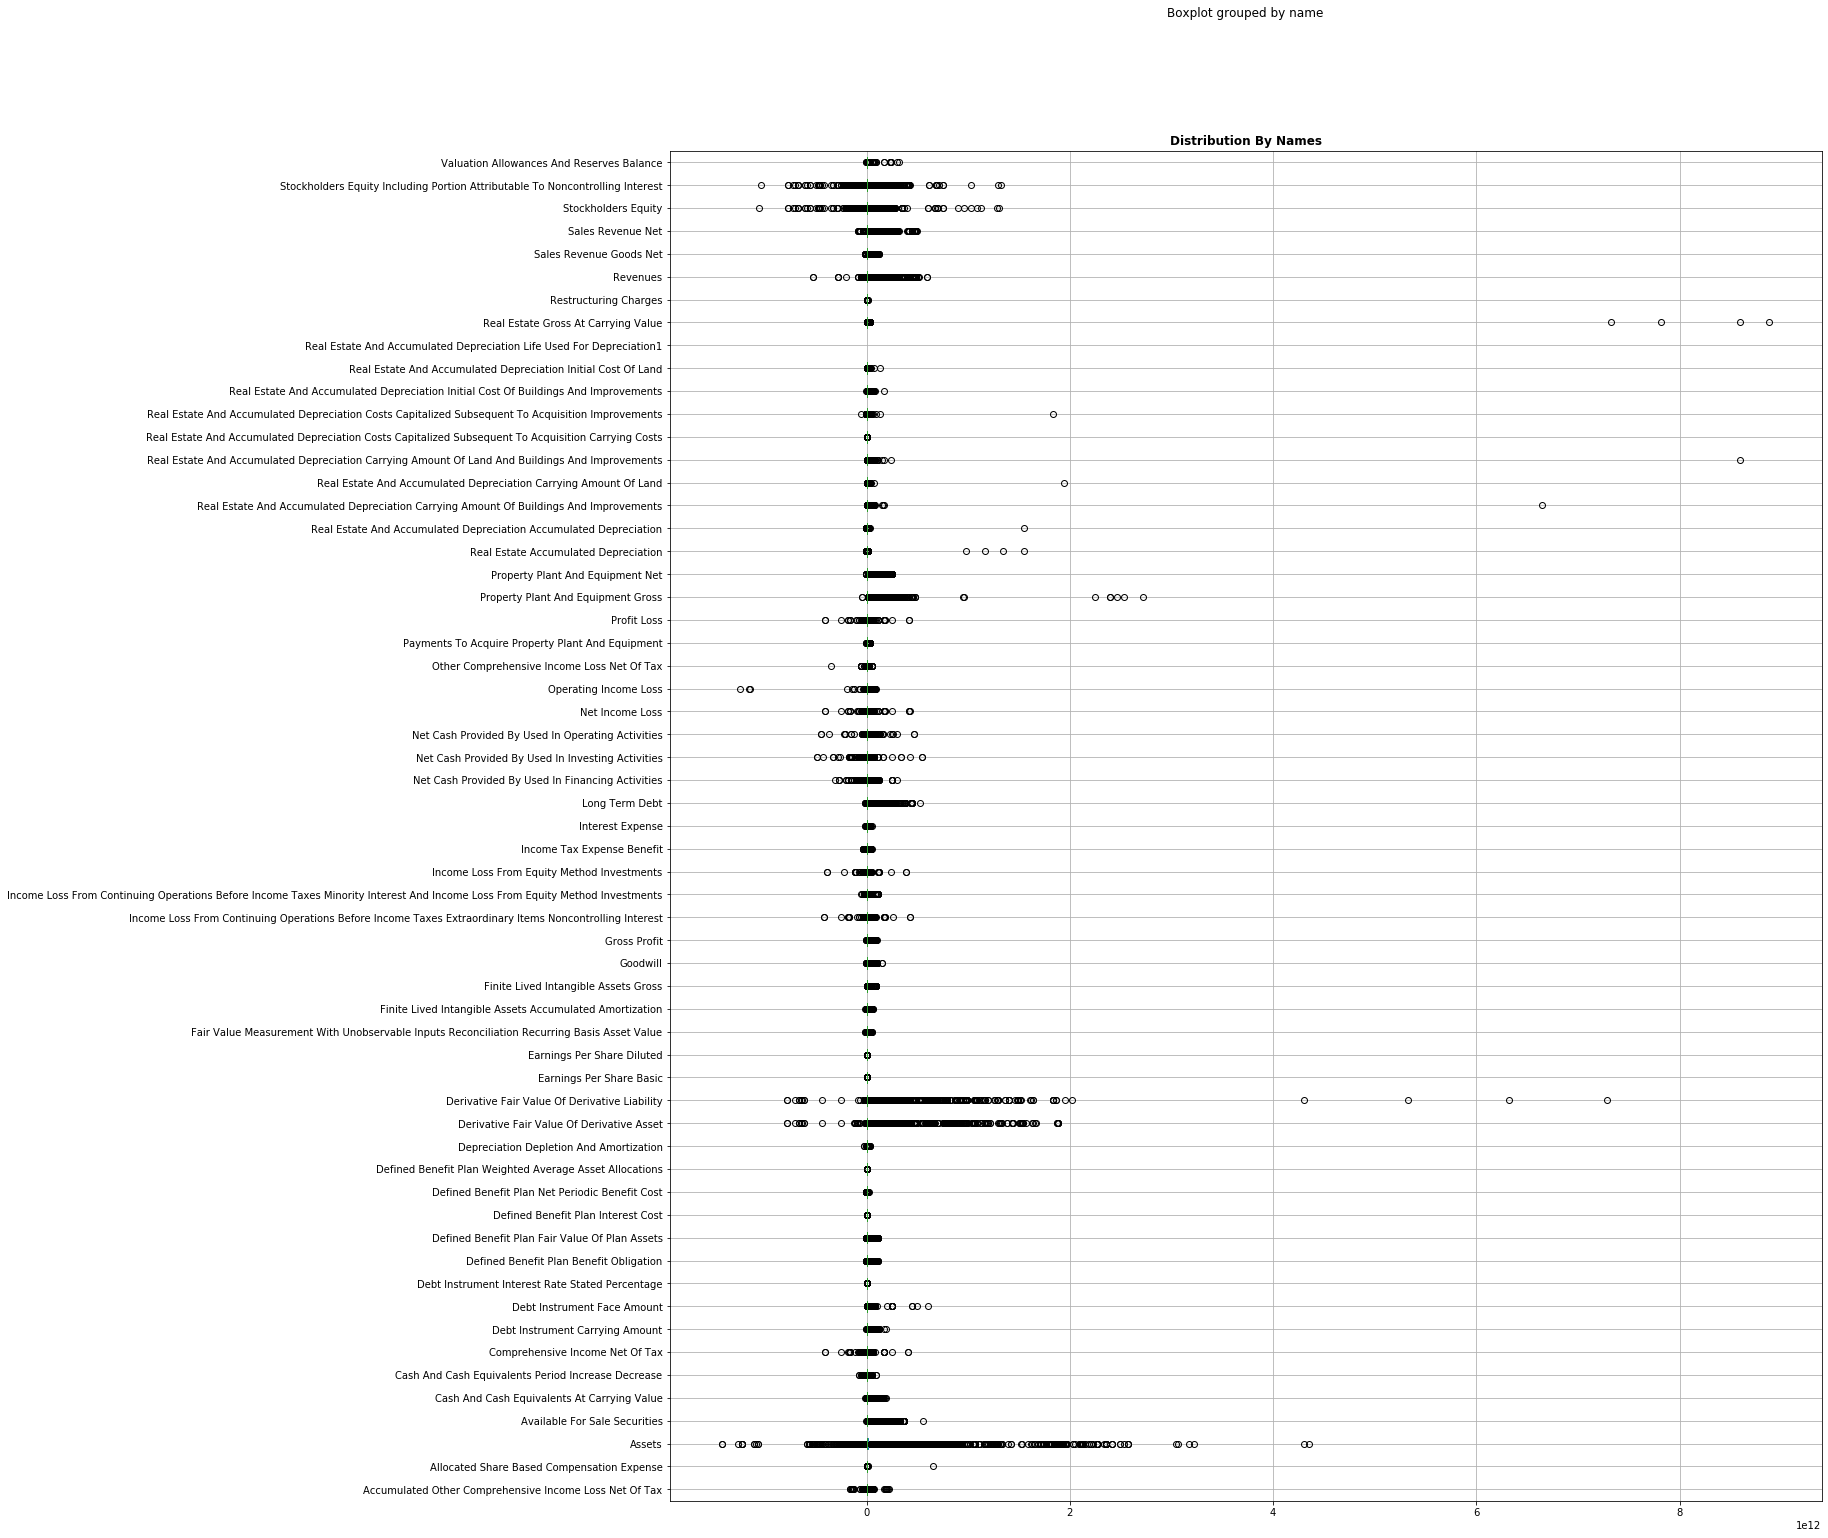

In [48]:
ax = edgar[
    (edgar['name'] != 'Derivative Notional Amount')
].boxplot(
    column='number', 
    by='name',
    vert=False,
    figsize=(20, 25)
)
ax.set_title('Distribution By Names', fontweight='bold')
ax.set_xlabel('');

In [49]:
edgar[
    (edgar['name'] == 'Real Estate Gross At Carrying Value') &
    (edgar['number'] > 500_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
6041212,Kimco Realty,Real Estate Gross At Carrying Value,NaN,usd,c1_AsOf31Dec2009,8.882341e+12
6041213,Kimco Realty,Real Estate Gross At Carrying Value,NaN,usd,c35_AsOf31Dec2008,7.818916e+12
6041214,Kimco Realty,Real Estate Gross At Carrying Value,NaN,usd,c18_AsOf31Dec2007,7.325035e+12
6041237,Kimco Realty,Real Estate Gross At Carrying Value,NaN,usd,c0_AsOf31Dec2010,8.592760e+12


Noted that numbers should be 8,882,341,499 (`6041212`), 7,818,916,120 (`6041213`), and 8,592,760,219 (`6041237` and `6041207`) respectively, from https://www.sec.gov/cgi-bin/viewer?action=view&cik=879101&accession_number=0001398432-11-000206&xbrl_type=v#.

In [50]:
edgar[
    (edgar['security'] == 'Apache Corporation') &
    (edgar['name'] == 'Allocated Share Based Compensation Expense')
]

,security,name,value,unit_ref,context_ref,number
1019316,Apache Corporation,Allocated Share Based Compensation Expense,NaN,usd,FD2016Q4YTD,131000000.0
1019317,Apache Corporation,Allocated Share Based Compensation Expense,NaN,usd,FD2016Q4YTD_us-gaap_AwardTypeAxis_apa_Conditio...,14000000.0
1019318,Apache Corporation,Allocated Share Based Compensation Expense,NaN,usd,FD2016Q4YTD_us-gaap_AwardTypeAxis_us-gaap_Rest...,113000000.0
1019319,Apache Corporation,Allocated Share Based Compensation Expense,NaN,usd,FD2017Q4YTD,142000000.0
1019320,Apache Corporation,Allocated Share Based Compensation Expense,NaN,usd,FD2017Q4YTD_us-gaap_AwardTypeAxis_apa_Conditio...,23000000.0
...,...,...,...,...,...,...
1049272,Apache Corporation,Allocated Share Based Compensation Expense,NaN,USD,TwelveMonthsEnded_31Dec2010_General_And_Admini...,98000000.0
1049273,Apache Corporation,Allocated Share Based Compensation Expense,NaN,USD,TwelveMonthsEnded_31Dec2010_Restricted_Stock_M...,73000000.0
1049274,Apache Corporation,Allocated Share Based Compensation Expense,NaN,USD,TwelveMonthsEnded_31Dec2010_Share_Appreciation...,49000000.0
1049275,Apache Corporation,Allocated Share Based Compensation Expense,NaN,USD,TwelveMonthsEnded_31Dec2010_Share_Appreciation...,27000000.0


In [51]:
edgar[
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Costs Capitalized Subsequent To Acquisition Improvements') &
    (edgar['number'] > 500_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
6041204,Kimco Realty,Real Estate And Accumulated Depreciation Costs...,NaN,usd,c1577_AsOf31Dec2010_TotalsMember,1.835426e+12


In [52]:
edgar[
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Carrying Amount Of Land And Buildings And Improvements') &
    (edgar['number'] > 500_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
6041207,Kimco Realty,Real Estate And Accumulated Depreciation Carry...,NaN,usd,c1577_AsOf31Dec2010_TotalsMember,8.592760e+12


In [53]:
edgar[
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Carrying Amount Of Buildings And Improvements') &
    (edgar['number'] > 500_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
6041206,Kimco Realty,Real Estate And Accumulated Depreciation Carry...,NaN,usd,c1577_AsOf31Dec2010_TotalsMember,6.646033e+12


In [54]:
edgar[
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Carrying Amount Of Land') &
    (edgar['number'] > 500_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
6041205,Kimco Realty,Real Estate And Accumulated Depreciation Carry...,NaN,usd,c1577_AsOf31Dec2010_TotalsMember,1.946727e+12


In [55]:
edgar[
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Accumulated Depreciation') &
    (edgar['number'] > 500_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
6041208,Kimco Realty,Real Estate And Accumulated Depreciation Accum...,NaN,usd,c1577_AsOf31Dec2010_TotalsMember,1.549380e+12


In [56]:
edgar.loc[
    (edgar['security'] == 'Kimco Realty') & 
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Costs Capitalized Subsequent To Acquisition Improvements') &
    (edgar['number'] > 500_000_000_000),
    'number'
] /= 1_000

In [57]:
edgar.loc[
    (edgar['security'] == 'Kimco Realty') & 
    (edgar['name'] == 'Real Estate Gross At Carrying Value') &
    (edgar['number'] > 500_000_000_000),
    'number'
] /= 1_000

In [58]:
edgar.loc[
    (edgar['security'] == 'Kimco Realty') & 
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Carrying Amount Of Land And Buildings And Improvements') &
    (edgar['number'] > 500_000_000_000),
    'number'
] /= 1_000

In [59]:
edgar.loc[
    (edgar['security'] == 'Kimco Realty') & 
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Carrying Amount Of Buildings And Improvements') &
    (edgar['number'] > 500_000_000_000),
    'number'
] /= 1_000

In [60]:
edgar.loc[
    (edgar['security'] == 'Kimco Realty') & 
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Carrying Amount Of Land') &
    (edgar['number'] > 500_000_000_000),
    'number'
] /= 1_000

In [61]:
edgar.loc[
    (edgar['security'] == 'Kimco Realty') & 
    (edgar['name'] == 'Real Estate And Accumulated Depreciation Accumulated Depreciation') &
    (edgar['number'] > 500_000_000_000),
    'number'
] /= 1_000

In [62]:
edgar.loc[
    (edgar['security'] == 'Kimco Realty') & 
    (edgar['name'] == 'Real Estate Accumulated Depreciation') &
    (edgar['number'] > 500_000_000_000),
    'number'
] /= 1_000

In [63]:
edgar[
    (edgar['name'] == 'Derivative Fair Value Of Derivative Liability') &
    (edgar['number'] > 4_000_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
1417590,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,FI2013Q4_us-gaap_DerivativeByNatureAxis_bac_Cr...,7.284000e+12
1417591,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,FI2013Q4_us-gaap_DerivativeByNatureAxis_bac_Cr...,5.330000e+12
1426620,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,I2012Q4_us-gaap_DerivativeByNatureAxis_bac_Cre...,4.306000e+12
1426626,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,I2012Q4_us-gaap_DerivativeByNatureAxis_bac_Cre...,6.322000e+12


Noted that numbers should be 7,284 million or 7,284,000,000 (`1417590`), 5,330 million or 5,330,000,000 (`1417591`), 4,306 million or 4,306,000,000 (`1426620`), and 6,322 million or 6,322,000,000 (`1426626`) respectively, from https://www.sec.gov/cgi-bin/viewer?action=view&cik=70858&accession_number=0000070858-14-000012&xbrl_type=v#.

In [64]:
edgar[
    (edgar['security'] == 'Bank of America Corp') & 
    (edgar['name'] == 'Derivative Fair Value Of Derivative Liability') &
    (edgar['number'] > 1_000_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
1417590,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,FI2013Q4_us-gaap_DerivativeByNatureAxis_bac_Cr...,7.284000e+12
1417591,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,FI2013Q4_us-gaap_DerivativeByNatureAxis_bac_Cr...,5.330000e+12
1417592,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,FI2013Q4_us-gaap_DerivativeByNatureAxis_bac_Cr...,1.954000e+12
1417610,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,FI2012Q4,1.364800e+12
1417612,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,FI2012Q4_us-gaap_DerivativeByNatureAxis_us-gaa...,1.067300e+12
1426620,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,I2012Q4_us-gaap_DerivativeByNatureAxis_bac_Cre...,4.306000e+12
1426624,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,I2012Q4_us-gaap_DerivativeByNatureAxis_bac_Cre...,2.016000e+12
1426626,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,I2012Q4_us-gaap_DerivativeByNatureAxis_bac_Cre...,6.322000e+12
1426643,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,I2011Q4_us-gaap_DerivativeByNatureAxis_us-gaap...,1.485300e+12
1426650,Bank of America Corp,Derivative Fair Value Of Derivative Liability,NaN,usd,I2011Q4,1.861300e+12


In [65]:
edgar.loc[
    [1417590, 1417591, 1417592, 1426620, 1426624, 1426626],
    'number'
] /= 1_000

In [66]:
edgar[
    (edgar['name'] == 'Assets') &
    (edgar['number'] > 4_000_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
4325340,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_CeiMember_us-ga...,4.354128e+12
4325341,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_CeiMember_us-ga...,4.303849e+12


Noted that number should be 4,354,128,000 (`4325340`), from https://www.sec.gov/cgi-bin/viewer?action=view&cik=1031296&accession_number=0001031296-12-000012&xbrl_type=v#.

In [67]:
edgar[
    (edgar['security'] == 'FirstEnergy Corp') & 
    (edgar['name'] == 'Assets') &
    (edgar['number'] > 500_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
4325337,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_TeMember_us-gaa...,1.614306e+12
4325338,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_TeMember_us-gaa...,1.625930e+12
4325340,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_CeiMember_us-ga...,4.354128e+12
4325341,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_CeiMember_us-ga...,4.303849e+12
4325348,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_PenelecMember_u...,3.224547e+12
4325350,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_PenelecMember_u...,3.062669e+12
4325357,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_MetEdMember_us-...,3.044670e+12
4325359,FirstEnergy Corp,Assets,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_MetEdMember_us-...,3.173856e+12


In [68]:
edgar[
    (edgar['security'] == 'FirstEnergy Corp') & 
    (edgar['name'] == 'Property Plant And Equipment Gross') &
    (edgar['number'] > 500_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
4333070,FirstEnergy Corp,Property Plant And Equipment Gross,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_TeMember_us-gaa...,9.624280e+11
4333072,FirstEnergy Corp,Property Plant And Equipment Gross,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_TeMember_us-gaa...,9.472030e+11
4333074,FirstEnergy Corp,Property Plant And Equipment Gross,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_CeiMember_us-ga...,2.396893e+12
4333075,FirstEnergy Corp,Property Plant And Equipment Gross,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_CeiMember_us-ga...,2.460117e+12
4333082,FirstEnergy Corp,Property Plant And Equipment Gross,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_PenelecMember_u...,2.532629e+12
4333083,FirstEnergy Corp,Property Plant And Equipment Gross,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_PenelecMember_u...,2.714541e+12
4333091,FirstEnergy Corp,Property Plant And Equipment Gross,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_MetEdMember_us-...,2.393501e+12
4333092,FirstEnergy Corp,Property Plant And Equipment Gross,NaN,usd,I2010Q4_dei_LegalEntityAxis_fe_MetEdMember_us-...,2.247853e+12


In [69]:
edgar.loc[
    (edgar['security'] == 'FirstEnergy Corp') & 
    (edgar['name'] == 'Assets') &
    (edgar['number'] > 500_000_000_000),
    'number'
] /= 1_000

In [70]:
edgar.loc[
    (edgar['security'] == 'FirstEnergy Corp') & 
    (edgar['name'] == 'Property Plant And Equipment Gross') &
    (edgar['number'] > 500_000_000_000),
    'number'
] /= 1_000

In [71]:
edgar[
    (edgar['name'] == 'Assets') &
    (edgar['number'] < -1_000_000_000_000)
]

,security,name,value,unit_ref,context_ref,number
4166019,Exxon Mobil Corp.,Assets,NaN,Unit12,As_Of_12_31_2010_dei_LegalEntityAxis_us-gaap_C...,-1.223592e+12
4166031,Exxon Mobil Corp.,Assets,NaN,Unit12,As_Of_12_31_2011_dei_LegalEntityAxis_us-gaap_C...,-1.267076e+12
4168754,Exxon Mobil Corp.,Assets,NaN,Unit12,As_Of_12_31_20092,-1.072666e+12
4168760,Exxon Mobil Corp.,Assets,NaN,Unit12,As_Of_12_31_20102,-1.223592e+12
4171796,Exxon Mobil Corp.,Assets,NaN,Unit12,As_Of_12_31_20092,-1.072666e+12
4171802,Exxon Mobil Corp.,Assets,NaN,Unit12,As_Of_12_31_20102,-1.223592e+12
4630039,General Electric,Assets,NaN,usd,FI2017Q4_srt_ConsolidationItemsAxis_ge_Elimina...,-1.421948e+12
4630057,General Electric,Assets,NaN,usd,FI2018Q4_srt_ConsolidationItemsAxis_ge_Elimina...,-1.227850e+12
4635131,General Electric,Assets,NaN,usd,FI2016Q4_us-gaap_ConsolidationItemsAxis_ge_Eli...,-1.112372e+12
4635148,General Electric,Assets,NaN,usd,FI2017Q4_us-gaap_ConsolidationItemsAxis_ge_Eli...,-1.424806e+12


---

In [72]:
pd.pivot(edgar, index='context_ref', columns='name')
#edgar.dropna(axis=1, how='all', inplace=True)
#edgar.info()

ValueError: Index contains duplicate entries, cannot reshape

---